# Analysis of the experimentation results

In [1]:
%cd ~/work/nbs_pipeline

/home/macu/work/nbs_pipeline


In [2]:
import pandas as pd
import numpy as np
import ydata_profiling as ydp
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import json
from copy import deepcopy

# Load experimentation data
## Select case file

In [3]:
#file_errors_small  = 'errors_small_03022025_2.csv'
#file_results_small = 'results_small_03022025_2.csv'
#file_errors_small  = 'errors_small_04022025_1.csv'
#file_results_small = 'results_small_04022025_1.csv'
#file_errors_small  = 'errors_small_06022025_1.csv'
#file_results_small = 'results_small_06022025_1.csv'
#file_errors_small  = 'errors_small_07022025_1.csv'
#file_results_small = 'results_small_07022025_1.csv'
file_errors_small  = 'errors_window_mix.csv'
file_results_small = 'results_window_mix.csv'
#file_errors_small  = 'errors_small_10022025_2.csv'
#file_results_small = 'results_small_10022025_2.csv'
file_errors_small  = 'errors_small_11022025_2.csv'
file_results_small = 'results_small_11022025_2.csv'
file_errors_small  = 'errors_small_11022025_3.csv'
file_results_small = 'results_small_11022025_3.csv' ## Solo deterministics
file_errors_small  = 'errors_small_11022025_4.csv'
file_results_small = 'results_small_11022025_4.csv' ## Deterministic & seed solo en torch
file_errors_small  = 'errors_small_12022025_1.csv'
file_results_small = 'results_small_12022025_1.csv' ## Deterministic & seed solo en torch

In [4]:
! ls {file_results_small}
! ls results_small_11022025*
! ls errors_small_11022025*

results_small_12022025_1.csv
results_small_11022025_1.csv  results_small_11022025_3.csv
results_small_11022025_2.csv  results_small_11022025_4.csv
errors_small_11022025_1.csv  errors_small_11022025_3.csv
errors_small_11022025_2.csv  errors_small_11022025_4.csv


In [5]:
results_small = pd.read_csv(file_results_small, index_col=None, header=0)
errors_small  = pd.read_csv(file_errors_small, index_col=None, header=0)

In [6]:
! tail 'errors_small_04022025_1.csv'

model_size,n_epochs,dataset_percent,masked_percent,n_windows,windows,error


In [7]:
print("----- ERRORS -----")
print(f"Total error cases: {len(errors_small)}")
display(errors_small.head())
print(f"Total results: {len(results_small)}")
display(results_small.tail())

----- ERRORS -----
Total error cases: 0


,model_size,n_epochs,dataset_percent,masked_percent,n_windows,windows,error,window


Total results: 24


,model_size,n_epochs,dataset_percent,masked_percent,n_windows,time,first_train_loss,first_mse,first_rmse,first_mae,...,last_mae,last_smape,windows,best_epochs,train_losses,eval_pre,eval_post,full_result,first_eval_loss,last_eval_loss
19,small,20,0.25,0.50,6,148.604650,0.008349,NaN,NaN,NaN,...,NaN,NaN,"[8, 10, 12, 13, 16, 17]",[7],"[0.008348668051493244, 0.0012096361878017583, ...","{'loss': [0.008348668051493244], 'mse': [nan],...","{'loss': [0.008324910225757562], 'mse': [nan],...","([[0.008348668051493244, 0.0012096361878017583...",0.008349,0.008325
20,small,20,0.25,0.75,6,136.458158,0.006384,NaN,NaN,NaN,...,NaN,NaN,"[8, 10, 12, 13, 16, 17]",[19],"[0.006383573105695713, 0.0010247677463277277, ...","{'loss': [0.006383573105695713], 'mse': [nan],...","{'loss': [0.006313800353810246], 'mse': [nan],...","([[0.006383573105695713, 0.0010247677463277277...",0.006384,0.006314
21,small,20,0.30,0.25,6,176.639354,0.005997,NaN,NaN,NaN,...,NaN,NaN,"[8, 10, 12, 13, 16, 17]",[3],"[0.005997182737499113, 0.0006814224088884657, ...","{'loss': [0.005997182737499113], 'mse': [nan],...","{'loss': [0.006015844529125995], 'mse': [nan],...","([[0.005997182737499113, 0.0006814224088884657...",0.005997,0.006016
22,small,20,0.30,0.50,6,169.291187,0.005614,NaN,NaN,NaN,...,NaN,NaN,"[8, 10, 12, 13, 16, 17]",[18],"[0.005614420482339079, 0.0005065662887371967, ...","{'loss': [0.005614420482339079], 'mse': [nan],...","{'loss': [0.005584470649612033], 'mse': [nan],...","([[0.005614420482339079, 0.0005065662887371967...",0.005614,0.005584
23,small,20,0.30,0.75,6,167.445937,0.007044,NaN,NaN,NaN,...,NaN,NaN,"[8, 10, 12, 13, 16, 17]",[11],"[0.007044257089546591, 0.0006796505840611644, ...","{'loss': [0.007044257089546591], 'mse': [nan],...","{'loss': [0.007005094587839267], 'mse': [nan],...","([[0.007044257089546591, 0.0006796505840611644...",0.007044,0.007005


In [8]:
(0.006430488714078606-0.006421495916369809)*100/0.006430488714078606

0.13984625599463982

## Check losses

In [9]:
import re

In [10]:
def get_loss(x, pos = 0):
    loss_value = np.nan
    if isinstance(x, dict) and 'loss' in x:
        #print("Is dict")
        loss_value = x['loss']
    else: 
        #print("Look for a match")
        match = re.search(r"'loss':\s*([\d\.\-e]+|\[.*?\])", x)
        if match: 
            #print("Is match")
            loss_value = ast.literal_eval(match.group(1))
    if isinstance(loss_value, list) and len(loss_value) > 0:
        #print("Is list")
        loss_value = loss_value[0]
    return loss_value
    
    return np.nan 

In [11]:
get_loss(results_small['eval_pre'][0])

0.007736432538984124

In [12]:
def check_valid_losses(df, display_ = True):
    check              = df[['eval_pre', 'eval_post']].copy()
    check['loss_pre']  = df['eval_pre'].apply(lambda x: get_loss(x, 0))
    check['loss_post'] = df['eval_post'].apply(lambda x: get_loss(x, -1))
    #check['loss_pre']  = df['eval_pre'].apply(lambda x: ast.literal_eval(x)['loss'][0])
    #check['loss_post'] = df['eval_post'].apply(lambda x: ast.literal_eval(x)['loss'][0])
    check['pre_less_than_post']    = check['loss_pre'] > check['loss_post']
    check['absolute_difference']   = check['loss_pre'] - check['loss_post']
    check['percentage_difference'] = (check['absolute_difference'] * 100 / check['loss_pre'])
    check_filtered = check[check['loss_post'] > check['loss_pre']]
    if display_: display(check_filtered)
    summary = {
        "total_cases": len(check_filtered),
        "mean_absolute_difference": check_filtered['absolute_difference'].mean(),
        "mean_percentage_difference": check_filtered['percentage_difference'].mean(),
        "max_absolute_difference": check_filtered['absolute_difference'].max(),
        "max_percentage_difference": check_filtered['percentage_difference'].max(),
        "min_absolute_difference": check_filtered['absolute_difference'].min(),
        "min_percentage_difference": check_filtered['percentage_difference'].min(),
    }
    return check['percentage_difference']

In [13]:
def check(id):
    print((results_small['loss_pre'][id][0]-results_small['loss_post'][id][0])*100/results_small['loss_post'][id][0])

## Preprocess

### Utils

In [14]:
def safe_eval(x, key):
    val = np.nan
    if isinstance(x, dict):
        val = x
    else: 
        if isinstance(x, str) and x.startswith("{") and x.endswith("}"):
            # Reemplazamos:
            # - comillas simples por dobles, para formar un JSON válido
            # - 'nan' por 'null', en caso de que aparezca
            x_mod = x.replace("'", '"').replace("nan", "null")
            try:
                val = json.loads(x_mod)[key]
            except json.JSONDecodeError as e:
                print("Error parsing ", x)
                print("Error details: ", e)
                raise e
    return val

In [15]:
def improvement_percentage(pre, post):
    return [(pre_val-p)*100 / pre_val if pre_val != 0 else np.nan for pre_val, p in zip(pre, post)]

In [16]:
def get_last(x):
    try:
        return ast.literal_eval(x)[-1]
    except:
        return x[-1]
def get_pos_last(x):
    try: 
        return get_pos(ast.literal_eval(x),-1)
    except:
        return get_pos(x,-1)

In [17]:
def get_pos(x, pos, pos2 = None): 
    try:
        return x[pos][pos2]
    except:
        try:
            return x[pos]
        except:
            return x

### Format & extract

In [18]:
results_small['windows']    = results_small['windows'].apply(lambda x: list(set(x)))
results_small['loss_pre']   = results_small["eval_pre"].apply(lambda x: safe_eval(x,'loss'))
results_small['loss_post']  = results_small["eval_post"].apply(lambda x: safe_eval(x, 'loss'))
results_small["best_epoch"] =  results_small["best_epochs"].apply(lambda x: get_last(x))

In [19]:
check(0)
#check(10)
#check(50)

0.19857851259815984


### Build improvement (from losses)

In [52]:
results_small['improvement'] = check_valid_losses(results_small, True)

,eval_pre,eval_post,loss_pre,loss_post,pre_less_than_post,absolute_difference,percentage_difference
3,"{'loss': [0.005750537991201889], 'mse': [nan],...","{'loss': [0.0057909790236461796], 'mse': [nan]...",0.005751,0.005791,False,-0.000040,-0.703257
11,"{'loss': [0.0076840799765705015], 'mse': [nan]...","{'loss': [0.007811086322362826], 'mse': [nan],...",0.007684,0.007811,False,-0.000127,-1.652850
13,"{'loss': [0.006687751061690506], 'mse': [nan],...","{'loss': [0.006704097251713392], 'mse': [nan],...",0.006688,0.006704,False,-0.000016,-0.244420
21,"{'loss': [0.005997182737499113], 'mse': [nan],...","{'loss': [0.006015844529125995], 'mse': [nan],...",0.005997,0.006016,False,-0.000019,-0.311176


In [21]:
print("Min: ", min(results_small["improvement"]))
print("Max: ", max(results_small["improvement"]))
print("Mean: ", np.mean(results_small["improvement"]))

Min:  -1.6528503891107178
Max:  2.115072022106504
Mean:  0.31706019712781525


## Build profile df

In [22]:
profile_small_df = results_small[[
    "time", 
    "best_epoch", 
    "dataset_percent", 
    "masked_percent", 
    "n_windows", 
    "improvement"
]].copy()

In [23]:
results_small["last_best_epoch"] = results_small["best_epochs"].apply(lambda x: get_pos_last(x))

## Check best improvements

<Axes: title={'center': 'Improvement per case'}>

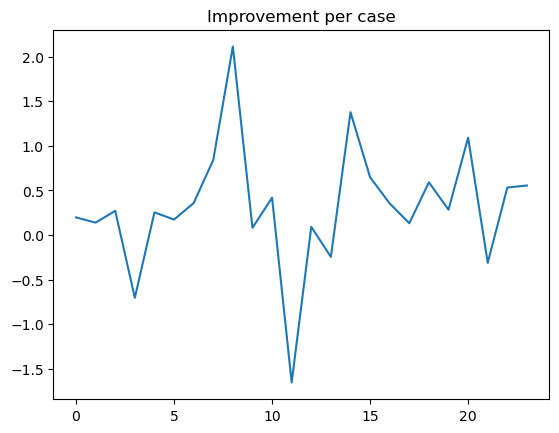

In [24]:
profile_small_df['improvement'].plot(title = "Improvement per case")

In [25]:
display(profile_small_df.sort_values('improvement', ascending = False)[:5])

,time,best_epoch,dataset_percent,masked_percent,n_windows,improvement
8,69.228467,7,0.25,0.75,6,2.115072
14,79.786771,18,0.15,0.75,6,1.377890
20,136.458158,19,0.25,0.75,6,1.093005
7,78.712401,0,0.25,0.50,6,0.841683
15,118.424373,19,0.20,0.25,6,0.648432


In [26]:
#display(results_small.iloc[109])

In [27]:
profile_small_df[profile_small_df["time"] < 8 ].shape

(0, 6)

In [28]:
display(profile_small_df.sort_values('improvement', ascending = False)[:10])

,time,best_epoch,dataset_percent,masked_percent,n_windows,improvement
8,69.228467,7,0.25,0.75,6,2.115072
14,79.786771,18,0.15,0.75,6,1.377890
20,136.458158,19,0.25,0.75,6,1.093005
7,78.712401,0,0.25,0.50,6,0.841683
15,118.424373,19,0.20,0.25,6,0.648432
18,137.672414,4,0.25,0.25,6,0.591617
23,167.445937,11,0.30,0.75,6,0.555949
22,169.291187,18,0.30,0.50,6,0.533445
10,80.363494,3,0.30,0.50,6,0.419330
6,64.580731,0,0.25,0.25,6,0.358928


In [29]:
print("--------------------- All dataset percent -----------------")
# Filtrar los 5 mejores loss_percents
display(profile_small_df.sort_values('improvement', ascending = False)[:5])
print("--------------------- Ensure dataset percent <= 0.25 -----------------")
# Filtrar los 5 mejores loss_percent con dataset percent <= 0.25
display(profile_small_df[profile_small_df['dataset_percent'] < 0.50].sort_values('improvement', ascending = False)[:5])

--------------------- All dataset percent -----------------


,time,best_epoch,dataset_percent,masked_percent,n_windows,improvement
8,69.228467,7,0.25,0.75,6,2.115072
14,79.786771,18,0.15,0.75,6,1.377890
20,136.458158,19,0.25,0.75,6,1.093005
7,78.712401,0,0.25,0.50,6,0.841683
15,118.424373,19,0.20,0.25,6,0.648432


--------------------- Ensure dataset percent <= 0.25 -----------------


,time,best_epoch,dataset_percent,masked_percent,n_windows,improvement
8,69.228467,7,0.25,0.75,6,2.115072
14,79.786771,18,0.15,0.75,6,1.377890
20,136.458158,19,0.25,0.75,6,1.093005
7,78.712401,0,0.25,0.50,6,0.841683
15,118.424373,19,0.20,0.25,6,0.648432


# Check Linear correlation 

In [30]:
def plot_correlation(profile, figsize=(8, 6)):
    correlation_matrix = profile.corr()
    # Crear el heatmap con seaborn
    plt.figure(figsize = figsize)  # Ajusta el tamaño si es necesario
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
    plt.title("Correlation Matrix")
    plt.show()

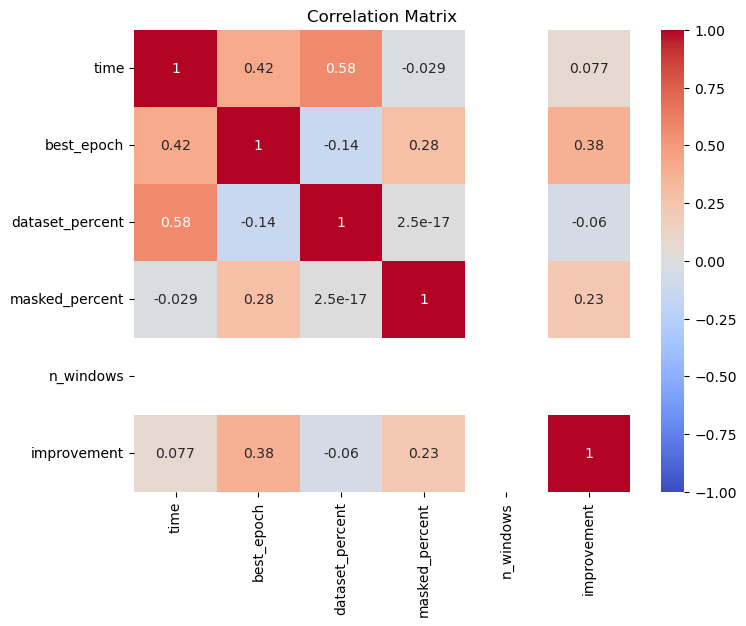

In [31]:
profile_small = ydp.ProfileReport(profile_small_df, title="Pandas Profiling Report for 'df_loss_small'", explorative=True)
plot_correlation(profile_small_df)

Dados los resultados creo que lo que más sentido tiene es hacer la tabla
- 0.25 dataset

In [32]:
results_small["best_epochs"][:10]

0    [5]
1    [2]
2    [5]
3    [1]
4    [1]
5    [9]
6    [0]
7    [0]
8    [7]
9    [0]
Name: best_epochs, dtype: object

In [33]:
results_small["best_epochs"] = results_small["best_epochs"].apply(lambda x: ast.literal_eval(x))

In [34]:
results_small["best_epochs"][0][0]

5

In [35]:
all_epochs = [epoch for sublist in results_small["best_epochs"] for epoch in sublist]
print("pre")
print(all_epochs)
all_epochs = [x for x in all_epochs if isinstance(x, int)]
print("post")
print(all_epochs)

pre
[5, 2, 5, 1, 1, 9, 0, 0, 7, 0, 3, 3, 17, 0, 18, 19, 15, 15, 4, 7, 19, 3, 18, 11]
post
[5, 2, 5, 1, 1, 9, 0, 0, 7, 0, 3, 3, 17, 0, 18, 19, 15, 15, 4, 7, 19, 3, 18, 11]


In [36]:
def epoch_frequencies(all_epochs):
    epoch_counts = pd.Series(all_epochs).value_counts().sort_index()
    plt.figure(figsize=(10, 5))
    plt.bar(epoch_counts.index, epoch_counts.values)
    plt.xlabel("Best epoch")
    plt.ylabel("Frequency")
    plt.title("Best epoch frequency")
    plt.xticks(epoch_counts.index)  # Asegurar que se muestren todas las épocas en el eje X
    plt.show()

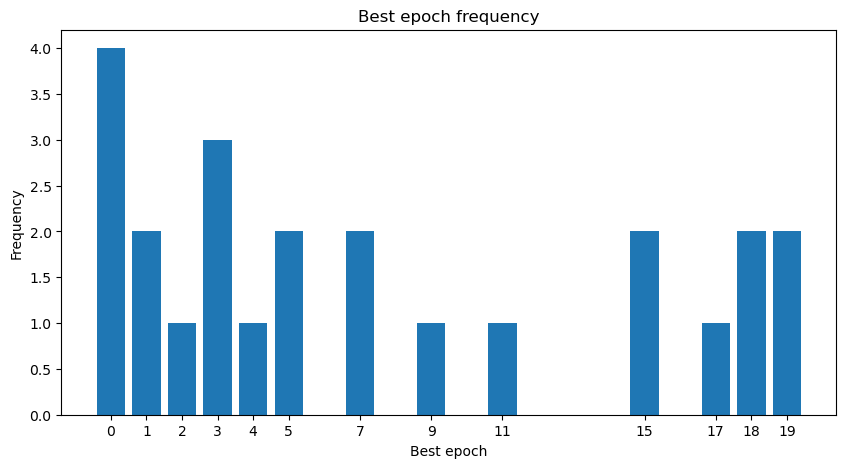

In [37]:
epoch_frequencies(all_epochs)

# Check feature relevance with other techniques
## Sklearn feature relevance analysis

### SelectKBest

In [38]:
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np
import pandas as pd

def select_k_best_features(df, target_column, k='all'):
    """
    Select the best features using SelectKBest and f_regression.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame with numerical features.
    target_column (str): The name of the target variable.
    k (int or 'all', optional): Number of best features to select (default 'all').
    
    Returns:
    pd.DataFrame: Feature importance scores sorted in descending order.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    selector = SelectKBest(score_func=f_regression, k=k)
    selector.fit(X, y)
    
    scores = selector.scores_
    feature_importance = scores / np.sum(scores)  # Normalize scores
    
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'SelectKBest_Score': scores,
        'SelectKBest_Percentage': feature_importance * 100
    })
    
    return importance_df.sort_values(by='SelectKBest_Percentage', ascending=False)


### Random forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_feature_importance(df, target_column):
    """
    Compute feature importance using a RandomForestRegressor.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame with numerical features.
    target_column (str): The name of the target variable.
    
    Returns:
    pd.DataFrame: Feature importance scores sorted in descending order.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    rf_importances = model.feature_importances_
    
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'RandomForest_Importance': rf_importances * 100
    })
    
    return importance_df.sort_values(by='RandomForest_Importance', ascending=False)


### Check cmbined feature importance

In [40]:
def analyse_feature_importance(df, target_column, k='all'):
    """
    Analyse feature importance using both SelectKBest and RandomForestRegressor.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame with numerical features.
    target_column (str): The name of the target variable.
    k (int or 'all', optional): Number of best features to select (default 'all').
    
    Returns:
    pd.DataFrame: Combined feature importance scores sorted in descending order.
    """
    k_best_df = select_k_best_features(df, target_column, k)
    rf_df = random_forest_feature_importance(df, target_column)
    
    combined_df = pd.merge(k_best_df, rf_df, on='Feature', how='outer')
    return combined_df.sort_values(by='RandomForest_Importance', ascending=False)


In [41]:
results_small["best_epochs"][0][0]

5

In [42]:
df = profile_small_df[["masked_percent", "n_windows", "dataset_percent", "improvement"]].copy()
df["best_epoch"] = results_small["best_epochs"].apply(lambda x: x[0])
df_feat = df [ df [ "masked_percent" ]  < 1 ]
df_feat = df_feat [ df_feat [ "masked_percent" ]  > 0 ]
df_feat = df_feat [ df_feat [ "dataset_percent" ]  < 1 ]
df_feat[:5]

,masked_percent,n_windows,dataset_percent,improvement,best_epoch
0,0.25,6,0.15,0.198185,5
1,0.50,6,0.15,0.139846,2
2,0.75,6,0.15,0.272117,5
3,0.25,6,0.20,-0.703257,1
4,0.50,6,0.20,0.255023,1


In [43]:
df_feat[pd.isna(df_feat["improvement"])]

,masked_percent,n_windows,dataset_percent,improvement,best_epoch


In [44]:
result = analyse_feature_importance(df_feat, target_column="improvement")
display(result)

,Feature,SelectKBest_Score,SelectKBest_Percentage,RandomForest_Importance
0,best_epoch,3.715682,73.877261,45.127978
1,masked_percent,1.235227,24.559465,32.898184
2,dataset_percent,0.078625,1.563274,21.973838
3,n_windows,0.000000,0.000000,0.000000


In [45]:
def count_epoch(df):
    all_epochs = df["best_epoch"]
    print(all_epochs.unique)
    epoch_counts = pd.Series(all_epochs).value_counts().sort_index()
    plt.figure(figsize=(10, 5))
    plt.bar(epoch_counts.index, epoch_counts.values)
    plt.xlabel("Best epoch")
    plt.ylabel("Frequency")
    plt.title("Best epoch frequency")
    plt.xticks(epoch_counts.index)  # Asegurar que se muestren todas las épocas en el eje X
    plt.show()

<bound method Series.unique of 0      5
1      2
2      5
3      1
4      1
5      9
6      0
7      0
8      7
9      0
10     3
11     3
12    17
13     0
14    18
15    19
16    15
17    15
18     4
19     7
20    19
21     3
22    18
23    11
Name: best_epoch, dtype: int64>


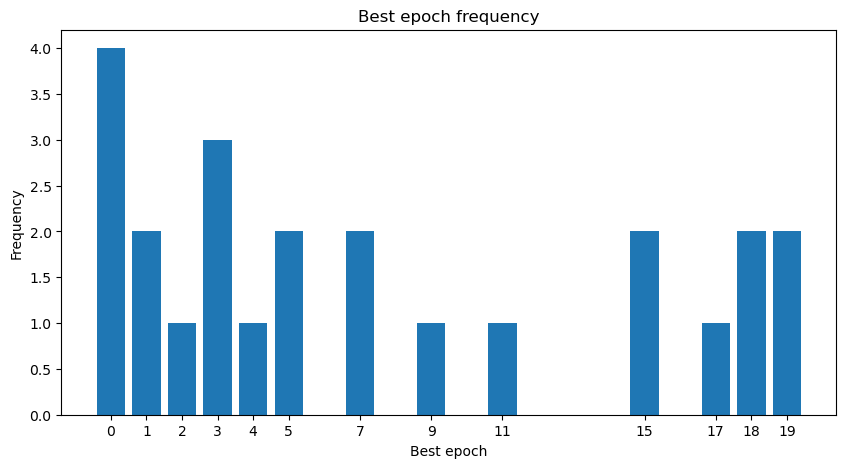

In [46]:
count_epoch(df_feat)

# Best option

In [47]:
def best_combination_for_improvement(df, target_column, importance_df):
    """
    A partir del análisis de importancia (importance_df), selecciona las dos variables 
    más relevantes (según el promedio de SelectKBest_Percentage y RandomForest_Importance). 
    Para cada una, obtiene el valor que da mayor improvement (promedio del target).
    Luego, filtra el DataFrame a esos casos y, en ese subconjunto, para cada variable restante,
    obtiene el valor que maximiza el improvement.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame de entrada.
    target_column : str
        Nombre de la variable objetivo (por ejemplo, "improvement").
    importance_df : pd.DataFrame
        DataFrame resultante de analyse_feature_importance, que debe contener las columnas 
        'Feature', 'SelectKBest_Percentage' y 'RandomForest_Importance'.
    
    Returns:
    --------
    best_values : dict
        Diccionario con para cada variable (tanto las top2 como las restantes) el valor óptimo.
    avg_impr : float or None
        Promedio de improvement en el subconjunto filtrado (puede ser None si no hay casos).
    """
    # Calcular la importancia promedio de cada feature
    importance_df = importance_df.copy()
    importance_df["AvgImportance"] = (importance_df["SelectKBest_Percentage"] + importance_df["RandomForest_Importance"]) / 2
    
    # Ordenar y seleccionar las dos variables más relevantes
    top_features = importance_df.sort_values(by="AvgImportance", ascending=False)["Feature"].tolist()
    top2 = top_features[:2]
    
    best_values = {}
    
    # Para cada una de las dos variables más importantes, obtener el valor que genera mayor improvement.
    for feat in top2:
        # Agrupamos por la variable y calculamos el promedio de improvement para cada valor
        grouped = df.groupby(feat)[target_column].mean().reset_index()
        # Seleccionamos el valor cuyo promedio de improvement es mayor
        best_row = grouped.loc[grouped[target_column].idxmax()]
        best_values[feat] = best_row[feat]
    
    # Filtrar el DataFrame a los casos en que las dos variables toman esos valores
    filtered_df = df.copy()
    for feat, val in best_values.items():
        filtered_df = filtered_df[filtered_df[feat] == val]
    
    # Para el resto de las variables (excluyendo las dos top y el target), buscar el valor que dentro
    # del subconjunto filtrado genere el mayor improvement
    remaining_features = [feat for feat in df.columns if feat not in top2 and feat != target_column]
    for feat in remaining_features:
        grouped = filtered_df.groupby(feat)[target_column].mean().reset_index()
        if len(grouped) > 0:
            best_row = grouped.loc[grouped[target_column].idxmax()]
            best_values[feat] = best_row[feat]
        else:
            best_values[feat] = None  # En caso de no haber datos suficientes
    
    # También se puede obtener el improvement promedio en los casos filtrados por las dos variables top
    if len(filtered_df) > 0:
        avg_impr = filtered_df[target_column].mean()
    else:
        avg_impr = None
    
    return best_values, avg_impr


In [48]:
feature_importance = analyse_feature_importance(df_feat, target_column="improvement")
display(feature_importance)
best_vals, avg_improvement = best_combination_for_improvement(df_feat, target_column="improvement", importance_df=feature_importance)

print("Mejor combinación de valores:")
for feat, val in best_vals.items():
    print(f"{feat}: {val}")

print(f"\nImprovement promedio en el subconjunto de las top2: {avg_improvement}")


,Feature,SelectKBest_Score,SelectKBest_Percentage,RandomForest_Importance
0,best_epoch,3.715682,73.877261,45.127978
1,masked_percent,1.235227,24.559465,32.898184
2,dataset_percent,0.078625,1.563274,21.973838
3,n_windows,0.000000,0.000000,0.000000


Mejor combinación de valores:
best_epoch: 7.0
masked_percent: 0.75
n_windows: 6.0
dataset_percent: 0.25

Improvement promedio en el subconjunto de las top2: 2.115072022106504


In [49]:
final = df_feat[ df_feat["n_windows"] == 4].copy()
final = final[ final["dataset_percent"] == 0.25]
final = final[ final ["masked_percent"] == 0.5]
final = final [ final [ "best_epoch" ] == 8]

In [50]:
final

,masked_percent,n_windows,dataset_percent,improvement,best_epoch
